## 6.7 Experiment with Random choice

In [1]:
# load basic libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone/notebooks
/Users/liuyang/Desktop/Springboard_Capstone


In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
sample_number = round(df.shape[0]*0.3*0.5)

In [5]:
def random_pick(n):
    return np.random.choice(df.target,n).sum()

In [6]:
random_pick(sample_number)

369

In [7]:
def randompick_average(n):
    return np.mean([random_pick(sample_number) for i in range(n)])

In [8]:
average_target_number = randompick_average(1000)
average_target_number

364.037

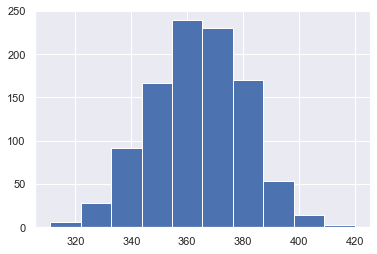

In [9]:
target_number_list = [random_pick(sample_number) for i in range(1000)]
plt.hist(target_number_list)
plt.show()

In [10]:
SE = np.std(target_number_list, ddof=1)/np.sqrt(len(target_number_list))
Z_critical= norm.ppf(.975)
margin_of_error = SE*Z_critical
margin_of_error

1.0568316112650644

In [11]:
print(round(average_target_number-margin_of_error))
print(round(average_target_number+margin_of_error))

363.0
365.0


conclusion: if we randomly sample enrollees from the total enrollees with the same size of the approach list we gained from model training, which contains 2754 samples, and repeat the sampling process for 1000 times, the average number of real Target enrollees contained in that sample is roughly around 363~365 (95% confidence interval).
<br>While use our best trained model we obtained 515 real Target enrollees from the same sample size. Machine Learning outperformed Non-ML method by 1.4 times in this case.